1. elite_level_code to average call duration correlation
2. wordcloud of call_transcript
3. agent wise average call duration and comparision
4. customer wise average call duration.--> ❌
5. agent wise + reason wise , call duration segregation
6. primary_call_reason average call time
7. AHT and AST calcultion
8. correlation between silent_percentage and customer_tone
9. relation between customer_tone and agent_tone
10. correlation between call_sentiment and silent_percentage
11. correlation between call_sentiment and call duration
12. correlation between customer tone and ast
13. ast and aht relation

To do:
1. Timing vs waiting time relation



In [ ]:
# !pip install spellchecker -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}
sns.set(rc = rc)

palette_color = sns.color_palette('dark')
palette1 = ['dimgrey','crimson']
palette2 = ['crimson', 'dimgrey']
palette3 = ['darkgreen', 'orange']
palette4 = ['salmon','mediumseagreen']
palette5 = ['mediumseagreen','salmon']
palette6 = sns.color_palette("YlOrBr")
palette_custom = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']


pd.options.display.max_columns = 50

# **Importing Data**

In [ ]:
cus_df = pd.read_csv('/content/drive/MyDrive/united spy hack-2/customers2afd6ea.csv')
calls_df = pd.read_csv("/content/drive/MyDrive/united spy hack-2/callsf0d4f5a.csv")
sent_df = pd.read_csv("/content/drive/MyDrive/united spy hack-2/sentiment_statisticscc1e57a.csv")
reasons_df = pd.read_csv("/content/drive/MyDrive/united spy hack-2/reason18315ff.csv")

In [ ]:
cus_df.shape, calls_df.shape, sent_df.shape, reasons_df.shape

((71810, 3), (71810, 7), (71810, 6), (66653, 2))

In [ ]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB


In [ ]:
calls_df["call_start_datetime"]= pd.to_datetime(calls_df["call_start_datetime"])
calls_df["agent_assigned_datetime"]= pd.to_datetime(calls_df["agent_assigned_datetime"])
calls_df["call_end_datetime"]= pd.to_datetime(calls_df["call_end_datetime"])

In [ ]:
calls_df['waiting_time'] = calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']
calls_df['call_time'] = calls_df['call_end_datetime'] - calls_df['call_start_datetime']

calls_df['waiting_time'] = (calls_df['waiting_time'].dt.total_seconds() / 60).astype(int) #in minutes
calls_df['call_time'] = (calls_df['call_time'].dt.total_seconds() / 60).astype(int)

In [ ]:
asa = calls_df['waiting_time'].mean()
aht = calls_df['call_time'].mean()
print(f"Average Speed to Answer {asa}")
print(f"Average Handle time {aht}")

Average Speed to Answer 7.284458988998747
Average Handle time 18.901935663556607


In [ ]:
# Merge calls_df with cus_df on customer_id
df = pd.merge(calls_df, cus_df, on='customer_id', how='left')

# Merge the result with sent_id on call_id and agent_id
df = pd.merge(df, sent_df, on=['call_id', 'agent_id'], how='left')

# Merge the result with reasons_df on call_id
df = pd.merge(df, reasons_df, on='call_id', how='left')
df.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'waiting_time', 'call_time', 'customer_name', 'elite_level_code',
       'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'primary_call_reason'],
      dtype='object')

In [ ]:
df.call_start_datetime.min()

Timestamp('2024-07-31 23:56:00')

In [ ]:
df.call_start_datetime.max()

Timestamp('2024-08-31 23:55:00')

In [ ]:
asct = df['average_sentiment'].mean()
aspt = df['silence_percent_average'].mean()
print(f"Average Sentiment Score {asct}")
print(f"Average Silence Percentage {aspt}")

Average Sentiment Score -0.0335186399073932
Average Silence Percentage 0.28551483080350926


In [ ]:
df["elite_level_code"] = df["elite_level_code"].fillna(0)

In [ ]:
import plotly.graph_objects as go

# Data preparation
tone_counts = df['customer_tone'].value_counts()

fig = go.Figure(data=[go.Pie(labels=tone_counts.index, values=tone_counts, hole=.1)])

fig.update_traces(textinfo='percent+label', texttemplate='%{label}<br>%{percent:.2%}', pull=[0.1] * len(tone_counts), hoverinfo='label+percent')
fig.show()

<ipython-input-14-ce0d706728d6>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-14-ce0d706728d6>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence

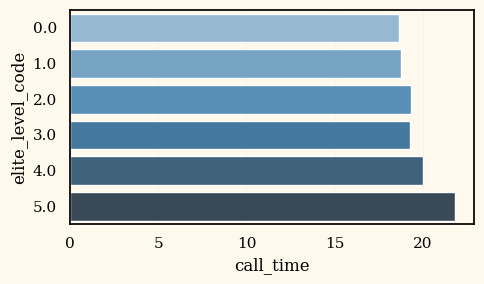

In [ ]:
df['elite_level_code'] = df['elite_level_code'].astype('category')

# Calculate average call time per elite level
avg_call_time_by_elite = df.groupby('elite_level_code')['call_time'].mean().reset_index()

# Set up the color palette (shades of blue)
sns.set_palette("Blues_d")

# Plot the barplot for average call time by elite level
plt.figure(figsize=(5,3))
sns.barplot(x='call_time', y='elite_level_code', data=avg_call_time_by_elite, palette="Blues_d", orient = "h")

# Add labels and title
# plt.title('Average Call Time by Elite Level Code')

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Waiting Time by Elite Level Code', 'Call Time by Elite Level Code'))

# Box plot for waiting time
fig.add_trace(
    go.Box(
        x=df['elite_level_code'],
        y=df['waiting_time'],
        name='Waiting Time',
        boxmean='sd'  # Display the mean and standard deviation
    ),
    row=1, col=1
)

# Box plot for call time
fig.add_trace(
    go.Box(
        x=df['elite_level_code'],
        y=df['call_time'],
        name='Call Time',
        boxmean='sd'  # Display the mean and standard deviation
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Waiting Time and Call Time by Elite Level Code',
    width=1200,  # Adjust width to fit both plots
    height=400
)

# Show the figure
fig.show()

<ipython-input-55-a9e567fe675f>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-55-a9e567fe675f>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



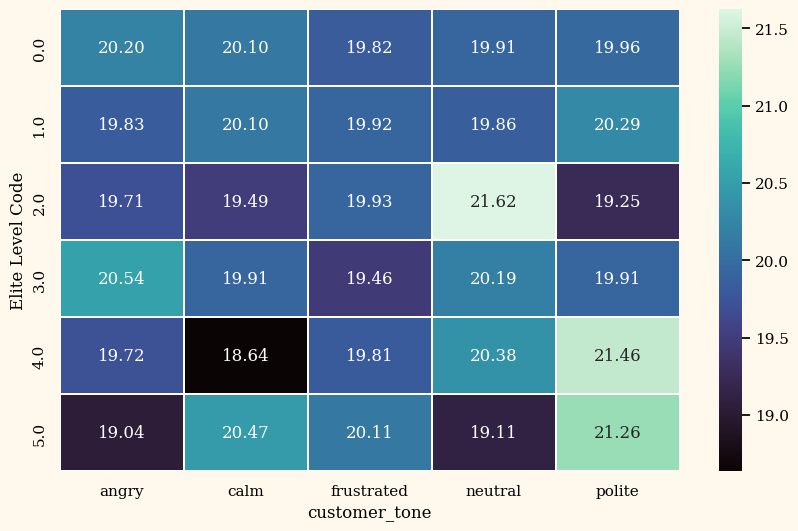

In [ ]:
tone_counts_customer = df.groupby(['elite_level_code', 'customer_tone']).size().reset_index(name='count')

# Step 2: Calculate the total counts for each elite level code
total_counts_customer = tone_counts_customer.groupby('elite_level_code')['count'].sum().reset_index(name='total_count')

# Step 3: Merge the two DataFrames to calculate percentages
merged_counts_customer = pd.merge(tone_counts_customer, total_counts_customer, on='elite_level_code')

# Step 4: Calculate the percentage
merged_counts_customer['percentage'] = (merged_counts_customer['count'] / merged_counts_customer['total_count']) * 100

# Step 5: Pivot the table to get a nicer format
result_table_customer = merged_counts_customer.pivot(index='elite_level_code', columns='customer_tone', values='percentage').fillna(0)

# Step 6: Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(result_table_customer, annot=True, cmap='mako', fmt='.2f',  linewidths=0.1, linecolor = "white")
# plt.title('Percentage of Customer Tone by Elite Level Code')
# plt.xlabel('Customer Tone')
plt.ylabel('Elite Level Code')
plt.show()

In [ ]:
# import nltk
# import string
# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download ('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# **WordCloud**

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def text_transform(text):
  y = []
  text = text.lower() # 1st step
  text = nltk.word_tokenize(text) # 2nd step
  for i in text:# 3 step
      if i.isalnum():
        y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  text = y[:]
  return " ".join(text)

In [ ]:
# df['transformed_text'] = df['call_transcript'].apply(text_transform)

In [ ]:
# from wordcloud import WordCloud
# wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white',collocations = False)
# cloud = wc.generate(df['transformed_text'].str.cat(sep = ' '))
# plt.imshow(cloud)

In [ ]:
# Calculate basic statistics for AHT (call_time) and ASA (waiting_time)
aht_stats = df['call_time'].describe()
asa_stats = df['waiting_time'].describe()

# Get the most frequent and least frequent primary call reasons
call_reason_counts = df['primary_call_reason'].value_counts()

# Calculate the average AHT for the most and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

avg_aht_most_frequent = df[df['primary_call_reason'] == most_frequent_reason]['call_time'].mean()
avg_aht_least_frequent = df[df['primary_call_reason'] == least_frequent_reason]['call_time'].mean()

# Calculate the percentage difference between most and least frequent call reasons
aht_percentage_diff = ((avg_aht_most_frequent - avg_aht_least_frequent) / avg_aht_least_frequent) * 100

In [ ]:
def standardize_primary_call_reason(reason):
    # Create a mapping for common variations
    mapping = {
        'Voluntary Cancel': 'Voluntary Cancel',
        'Voluntary Cancel ': 'Voluntary Cancel',
        'Voluntary  Cancel': 'Voluntary Cancel',
        'Voluntary Change': 'Voluntary Change',
        'Voluntary   Change': 'Voluntary Change',
        'Voluntary Change ': 'Voluntary Change',
        'Voluntary Change  ': 'Voluntary Change',
        'Mileage Plus': 'Mileage Plus',
        'Mileage   Plus': 'Mileage Plus',
        'Mileage Plus ': 'Mileage Plus',
        'Mileage  Plus': 'Mileage Plus',
        'Post Flight': 'Post-Flight',
        'Post-Flight ': 'Post-Flight',
        'Post-Flight  ': 'Post-Flight',
        'Traveler Updates': 'Traveler Updates',
        'Traveler  Updates': 'Traveler Updates',
        'Traveler Updates ': 'Traveler Updates',
        'Other Topics': 'Other Topics',
        'Other  Topics': 'Other Topics',
        'Other Topics  ': 'Other Topics',
        'Baggage': 'Baggage',
        'Baggage ': 'Baggage',
        'Baggage  ': 'Baggage',
        'Schedule Change': 'Schedule Change',
        'Schedule Change ': 'Schedule Change',
        'Schedule Change  ': 'Schedule Change',
        'Upgrade': 'Upgrade',
        'Upgrade ': 'Upgrade',
        'Upgrade  ': 'Upgrade',
        'Digital Support': 'Digital Support',
        'Digital   Support': 'Digital Support',
        'Digital Support  ': 'Digital Support',
        'Communications': 'Communications',
        'Communications  ': 'Communications',
        'ETC': 'ETC',
        'ETC  ': 'ETC',
        'Disability': 'Disability',
        'Unaccompanied Minor': 'Unaccompanied Minor',
        'Unaccompanied Minor ': 'Unaccompanied Minor',
        'Check In': 'Check-In',
        'Check-In': 'Check-In',
        'Check-In  ': 'Check-In',
        'Products & Services': 'Products and Services',
        'Products & Services ': 'Products and Services',
        'Products & Services  ': 'Products and Services',
        'IRROPS': 'IRROPS',
        'IRROPS  ': 'IRROPS',
        'Checkout': 'Checkout',
        'Checkout ': 'Checkout',
        'Checkout  ': 'Checkout',
        'Communications  ': 'Communications',
        'Digital  Support': 'Digital Support',
        'Other Topics  ': 'Other Topics',
        'Voluntary  Change': 'Voluntary Change',
        'Traveler   Updates': 'Traveler Updates',
        # Add any additional mappings as needed
    }

    # Strip leading and trailing whitespace
    if isinstance(reason, str):
        reason = reason.strip()

    # Return the standardized value
    return mapping.get(reason, reason)  # Return the original if not found

# Apply the standardization function
df['primary_call_reason'] = df['primary_call_reason'].apply(standardize_primary_call_reason)

In [ ]:
reason_counts = df['primary_call_reason'].value_counts()

# Step 2: Filter to only those reasons with a frequency greater than 30
filtered_reasons = reason_counts[reason_counts > 30].index

# Step 3: Calculate the average waiting_time for the filtered primary_call_reason
average_handling_time = df[df['primary_call_reason'].isin(filtered_reasons)] \
    .groupby('primary_call_reason')['call_time'].mean().reset_index()

# Step 4: Create a bar graph
fig = px.bar(average_handling_time,
             x='call_time',
             y='primary_call_reason',
             title='Average Handling Time by Primary Call Reason (Frequency > 30)',
             labels={'primary_call_reason': 'Primary Call Reason', 'call_time': 'Average Handling Time'},
             color='call_time',
             orientation='h',  # Set orientation to horizontal
             width=800, height=800)

# Show the figure
fig.show()

In [ ]:
reason_counts = df['primary_call_reason'].value_counts()

# Step 2: Filter to only those reasons with a frequency greater than 30
filtered_reasons = reason_counts[reason_counts > 30].index

# Step 3: Calculate the average waiting_time for the filtered primary_call_reason
average_handling_time = df[df['primary_call_reason'].isin(filtered_reasons)] \
    .groupby('primary_call_reason')['silence_percent_average'].mean().reset_index()

# Step 4: Create a bar graph
fig = px.bar(average_handling_time,
             x='primary_call_reason',
             y='silence_percent_average',
             title='Average Handling Time by Primary Call Reason (Frequency > 30)',
             labels={'primary_call_reason': 'Primary Call Reason', 'call_time': 'Average Handling Time'},
             color='silence_percent_average',
             width=800, height=400)

# Show the figure
fig.show()

In [ ]:
# # Create a bar graph
# fig = px.bar(average_handling_time,
#              x='primary_call_reason',
#              y='average_sentiment',
#              title='Average Handling Time by Primary Call Reason (Frequency > 30)',
#              labels={'primary_call_reason': 'Primary Call Reason', 'average_sentiment': 'Average Sentiment'},
#              color='average_sentiment',
#              width=800, height=400)

# # Update layout to make x-axis labels perpendicular
# fig.update_layout(
#     xaxis_tickangle=90  # Set the angle of x-axis labels to 90 degrees
# )

# # Show the figure
# fig.show()

In [ ]:
import pandas as pd
agent_summary = (
    df
    .groupby('agent_id')
    .agg(
        total_calls_handled=('call_id', 'count'),
        average_call_time=('call_time', 'mean'),
        average_sentiment=('average_sentiment', 'mean'),
        average_silence_percentage=('silence_percent_average', 'mean')
    )
    .reset_index()
)

# Filter agents with more than 50 calls
agent_summary_filtered = agent_summary[agent_summary['total_calls_handled'] > 20]

# Sort the agents based on the defined criteria
# Lower average sentiment, higher average call time, and higher average silence percentage
agent_df = agent_summary_filtered.sort_values(
    by=['average_call_time', 'average_silence_percentage', 'average_sentiment'],
    ascending=[False, False, True]  # True for ascending, False for descending
)
# sorted_agents.head(20)

<Axes: xlabel='average_call_time', ylabel='Count'>

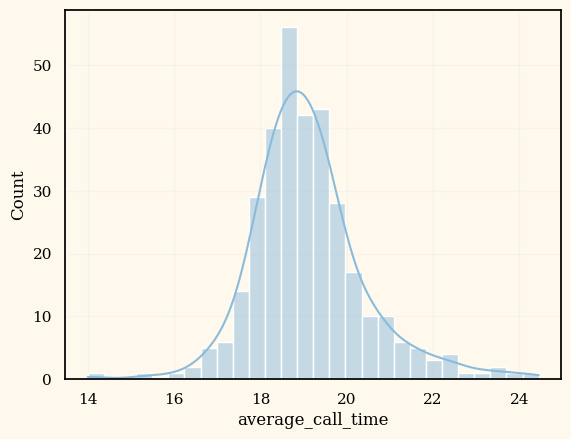

In [ ]:
# KDE Plot for Average Call Time
sns.histplot(data=agent_df['average_call_time'], kde=True, label='Average Call Time')

# KDE Plot for Average Sentiment
# sns.kdeplot(data=agent_df['average_sentiment'], fill=True, color='green', alpha=0.5, label='Average Sentiment')

# # KDE Plot for Average Silence Percentage
# sns.kdeplot(data=agent_df['average_silence_percentage'], fill=True, color='orange', alpha=0.5, label='Average Silence Percentage')


# plt.show()


In [ ]:
df.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'waiting_time', 'call_time', 'customer_name', 'elite_level_code',
       'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'primary_call_reason'],
      dtype='object')

In [ ]:
# Group by customer tone and calculate the average silence percentage
average_silence_by_tone = (
    df
    .groupby('customer_tone')
    .agg(average_silence_percentage=('silence_percent_average', 'mean'))
    .reset_index()
)

# Sort the result for better visibility
average_silence_by_tone = average_silence_by_tone.sort_values(by='average_silence_percentage', ascending=False)

# Display the result
print(average_silence_by_tone)

  customer_tone  average_silence_percentage
0         angry                   -0.032427
1          calm                   -0.032501
3       neutral                   -0.033709
4        polite                   -0.034475
2    frustrated                   -0.034490


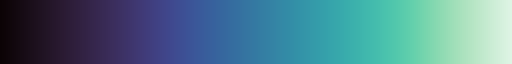

In [ ]:
sns.color_palette("mako", as_cmap=True)

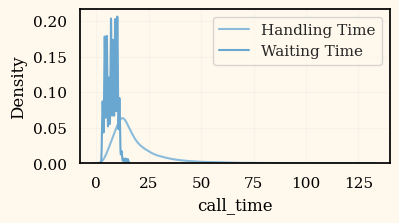

In [ ]:
plt.figure(figsize = (4, 2))
sns.kdeplot(data = df, x = 'call_time', label = 'Handling Time')
sns.kdeplot(data = df, x = 'waiting_time', label = 'Waiting Time')
plt.legend()

In [ ]:
# Extracting common issues from call transcripts to identify recurring self-solvable problems.
# Since the transcripts might be lengthy, we will conduct a simple word frequency analysis to capture recurring patterns.

from sklearn.feature_extraction.text import CountVectorizer

# Vectorizing the call transcripts to find common phrases or issues
vectorizer = CountVectorizer(stop_words='english', max_features=20, ngram_range=(1, 2))
transcript_matrix = vectorizer.fit_transform(df['call_transcript'])

# Sum up the counts of each word
word_freq = transcript_matrix.sum(axis=0)
word_freq = [(word, word_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent phrases
word_freq


[('flight', 631962),
 ('agent', 555458),
 ('customer', 549932),
 ('let', 310728),
 ('change', 248693),
 ('help', 201067),
 ('like', 194177),
 ('thank', 184727),
 ('united', 173306),
 ('calling', 159962),
 ('okay', 156940),
 ('typing', 155719),
 ('just', 135322),
 ('work', 134236),
 ('day', 133868),
 ('time', 127528),
 ('need', 126268),
 ('yeah', 123142),
 ('really', 119979),
 ('thanks', 119782)]

In [ ]:
df.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'waiting_time', 'call_time', 'customer_name', 'elite_level_code',
       'agent_tone', 'customer_tone', 'average_sentiment',
       'silence_percent_average', 'primary_call_reason'],
      dtype='object')

In [ ]:
avg_call_time_per_tone = df.groupby('customer_tone')['call_time'].mean().reset_index()
avg_call_time_per_tone

,customer_tone,call_time
0,angry,18.866255
1,calm,18.957273
2,frustrated,18.825702
3,neutral,19.089657
4,polite,18.769327


<Figure size 400x200 with 0 Axes>

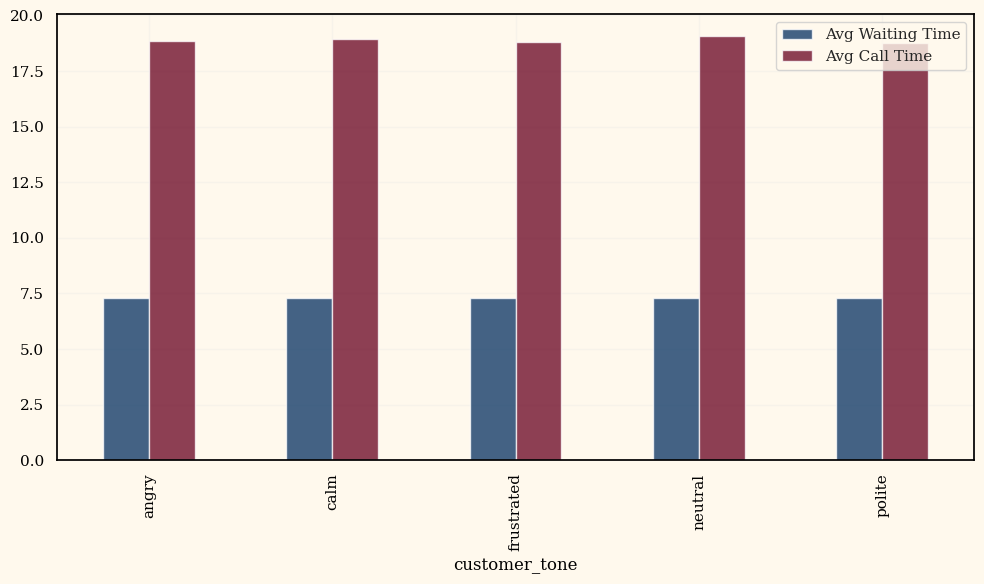

In [ ]:
plt.figure(figsize=(4,2))
avg_waiting_time_per_tone = df.groupby('customer_tone')['waiting_time'].mean().reset_index()

# Group by 'customer_tone' and calculate mean of 'call_time'
avg_call_time_per_tone = df.groupby('customer_tone')['call_time'].mean().reset_index()

# Merge the two DataFrames on 'customer_tone'
merged_df = pd.merge(avg_waiting_time_per_tone, avg_call_time_per_tone, on='customer_tone')

# Rename columns for clarity
merged_df.columns = ['customer_tone', 'avg_waiting_time', 'avg_call_time']

# Plotting the results
merged_df.set_index('customer_tone', inplace=True)

# Create a bar plot
merged_df.plot(kind='bar', figsize=(10, 6), alpha=0.75, colormap= plt.cm.RdBu_r)
plt.title('Average Waiting Time and Call Time by Customer Tone')
plt.ylabel('Time (in seconds)')
plt.xlabel('Customer Tone')
plt.xticks(rotation=45)
plt.legend(['Avg Waiting Time', 'Avg Call Time'])
plt.tight_layout()

# Show plot
plt.show()


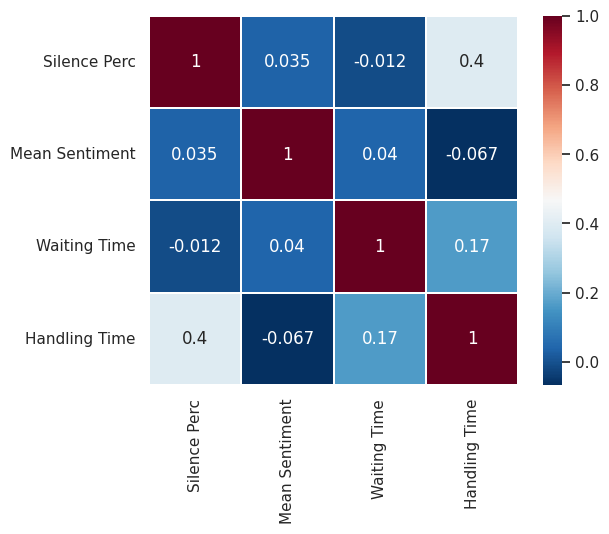

In [ ]:
correlation_columns = [
    'silence_percent_average',
    'average_sentiment',
    'waiting_time',
    'call_time'
]

# Create a dictionary for custom labels
custom_labels = {
    'silence_percent_average': 'Silence Perc',
    'average_sentiment': 'Mean Sentiment',
    'waiting_time': 'Waiting Time',
    'call_time': 'Handling Time'
}

# Create a correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Rename columns and index in the correlation matrix
correlation_matrix = correlation_matrix.rename(index=custom_labels, columns=custom_labels)

# Plot the heatmap with customized labels
sns.heatmap(correlation_matrix, annot=True, square=True, linewidths=0.1, linecolor="white", cmap=plt.cm.RdBu_r)

# Show the plot
plt.show()


In [ ]:
px.box(df, x='customer_tone', y='waiting_time',
             title='Distribution of Waiting Time by Customer Tone',
             labels={'customer_tone': 'Customer Tone', 'waiting_time': 'Call Time (seconds)'})

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming your dataframe is called 'df'
# Calculate mean and standard deviation
mean = df['call_time'].mean()
std_dev = df['call_time'].std()

# Define the thresholds for outliers
lower_limit = mean - 2 * std_dev
upper_limit = mean + 2 * std_dev

# Filter the dataframe to remove outliers
filtered_df = df[(df['call_time'] >= lower_limit) & (df['call_time'] <= upper_limit)]

# Create the box plot for the filtered data
fig = px.box(filtered_df, x='customer_tone', y='call_time',
             title='Distribution of Call Time by Customer Tone (Outliers Removed)',
             labels={'customer_tone': 'Customer Tone', 'call_time': 'Call Time (seconds)'})

# Show the plot
fig.show()

# Optional: Check the number of rows before and after dropping outliers
print(f"Original number of rows: {len(df)}")
print(f"Filtered number of rows: {len(filtered_df)}")

Original number of rows: 71810
Filtered number of rows: 68500


In [ ]:
import pandas as pd

# Assuming your dataframe is called 'df'

# Calculate mean and standard deviation for waiting_time and call_time
waiting_time_mean = df['waiting_time'].mean()
waiting_time_std = df['waiting_time'].std()
call_time_mean = df['call_time'].mean()
call_time_std = df['call_time'].std()

# Define the thresholds for outliers
waiting_time_lower_limit = waiting_time_mean - 2 * waiting_time_std
waiting_time_upper_limit = waiting_time_mean + 2 * waiting_time_std

call_time_lower_limit = call_time_mean - 2 * call_time_std
call_time_upper_limit = call_time_mean + 2 * call_time_std

# Filter the dataframe to remove outliers for both columns
filtered_df = df[
    (df['waiting_time'] >= waiting_time_lower_limit) & (df['waiting_time'] <= waiting_time_upper_limit) &
    (df['call_time'] >= call_time_lower_limit) & (df['call_time'] <= call_time_upper_limit)
]

# Calculate the mean of waiting_time and call_time, grouped by customer_tone in the filtered data
mean_values = filtered_df.groupby('customer_tone')[['waiting_time', 'call_time']].mean().reset_index()

# Display the result
print(mean_values)

  customer_tone  waiting_time  call_time
0         angry      7.178995  16.695665
1          calm      7.199511  16.670322
2    frustrated      7.189658  16.681473
3       neutral      7.206739  16.792746
4        polite      7.187859  16.617872


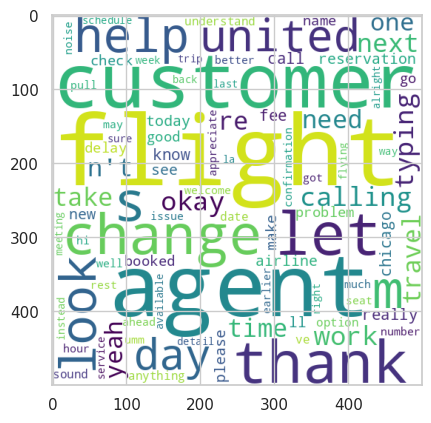

In [ ]:
# from wordcloud import WordCloud
# wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white',collocations = False)
# cloud = wc.generate(data['cleaned_transcript'].str.cat(sep = ' '))
# plt.imshow(cloud)

In [ ]:
def assign_time_bucket(hour):
    if 0 <= hour < 4:
        return '00-04'
    elif 4 <= hour < 8:
        return '04-08'
    elif 8 <= hour < 12:
        return '08-12'
    elif 12 <= hour < 16:
        return '12-16'
    elif 16 <= hour < 20:
        return '16-20'
    else:
        return '20-00'

df['time_bucket'] = df['call_start_datetime'].dt.hour.apply(assign_time_bucket)

# Grouping by the time bucket and calculating necessary stats
bucket_stats = df.groupby('time_bucket').agg(
    total_calls=('call_id', 'count'),
    avg_waiting_time=('waiting_time', 'mean'),
    avg_call_time=('call_time', 'mean'),
    avg_sentiment=('average_sentiment', 'mean')
).reset_index()
bucket_stats

,time_bucket,total_calls,avg_waiting_time,avg_call_time,avg_sentiment
0,00-04,4394,7.286299,19.163177,-0.030820
1,04-08,4861,7.315779,18.893643,-0.034127
2,08-12,20961,7.299175,18.935356,-0.033180
3,12-16,20854,7.278652,18.854368,-0.033269
4,16-20,16251,7.279675,18.929727,-0.034593
5,20-00,4489,7.224326,18.619514,-0.034351


In [ ]:
def assign_time_bucket(hour):
    if 0 <= hour < 4:
        return '00-04'
    elif 4 <= hour < 8:
        return '04-08'
    elif 8 <= hour < 12:
        return '08-12'
    elif 12 <= hour < 16:
        return '12-16'
    elif 16 <= hour < 20:
        return '16-20'
    else:
        return '20-24'

df['time_bucket'] = df['agent_assigned_datetime'].dt.hour.apply(assign_time_bucket)

# Grouping by the time bucket and calculating necessary stats
bucket_stats = df.groupby('time_bucket').agg(
    total_calls=('call_id', 'count'),
    avg_waiting_time=('waiting_time', 'mean'),
    avg_call_time=('call_time', 'mean'),
    avg_sentiment=('average_sentiment', 'mean')
).reset_index()
bucket_stats

,time_bucket,total_calls,avg_waiting_time,avg_call_time,avg_sentiment
0,00-04,4389,7.259512,19.086352,-0.031118
1,04-08,4375,7.240457,18.965714,-0.034724
2,08-12,21001,7.300986,18.933146,-0.033144
3,12-16,20812,7.279022,18.852153,-0.033544
4,16-20,16730,7.303108,18.930663,-0.034296
5,20-24,4503,7.230291,18.638019,-0.033433


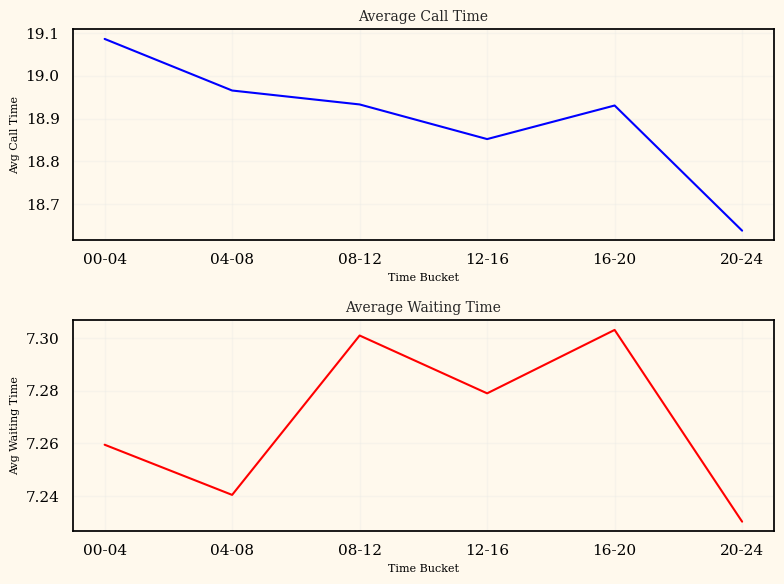

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(8, 6))  # Adjusted figsize for better visibility

# Plot avg_call_time on the first subplot
sns.lineplot(x="time_bucket", y="avg_call_time", data=bucket_stats, ax=axes[0], color="blue")
axes[0].set_title('Average Call Time', fontsize=10)  # Smaller font for title
axes[0].set_xlabel('Time Bucket', fontsize=8)        # Smaller font for x-axis
axes[0].set_ylabel('Avg Call Time', fontsize=8)      # Smaller font for y-axis

# Plot avg_waiting_time on the second subplot
sns.lineplot(x="time_bucket", y="avg_waiting_time", data=bucket_stats, ax=axes[1], color="red")
axes[1].set_title('Average Waiting Time', fontsize=10)  # Smaller font for title
axes[1].set_xlabel('Time Bucket', fontsize=8)           # Smaller font for x-axis
axes[1].set_ylabel('Avg Waiting Time', fontsize=8)      # Smaller font for y-axis

# Adjust layout
plt.tight_layout()
plt.show()



In [ ]:
# First, let's create the time buckets if not already done
df['time_bucket'] = df['call_start_datetime'].dt.hour.apply(assign_time_bucket)

# Group by both 'time_bucket' and 'primary_call_reason' to get the frequency count
reason_frequency = df.groupby(['time_bucket', 'primary_call_reason']).size().reset_index(name='reason_count')

# Calculate the total calls per time bucket to find relative frequencies (optional)
total_calls_per_bucket = df.groupby('time_bucket')['call_id'].count().reset_index(name='total_calls')

# Merge the reason frequency with total calls per bucket to calculate the percentage of each reason in a time bucket
reason_frequency = pd.merge(reason_frequency, total_calls_per_bucket, on='time_bucket')
reason_frequency['reason_percentage'] = (reason_frequency['reason_count'] / reason_frequency['total_calls']) * 100

# Sorting the data to get the most frequent primary reasons in each bucket
reason_frequency_sorted = reason_frequency.sort_values(['time_bucket', 'reason_percentage'], ascending=[True, False])

reason_frequency_sorted

,time_bucket,primary_call_reason,reason_count,total_calls,reason_percentage
8,00-04,IRROPS,763,4394,17.364588
19,00-04,Voluntary Change,684,4394,15.566682
14,00-04,Seating,369,4394,8.397815
9,00-04,Mileage Plus,363,4394,8.261265
11,00-04,Post-Flight,275,4394,6.258534
...,...,...,...,...,...
110,20-00,Other Topics,55,4489,1.225217
115,20-00,Traveler Updates,53,4489,1.180664
113,20-00,Schedule Change,44,4489,0.980174
106,20-00,Disability,19,4489,0.423257


In [ ]:
import plotly.express as px

# Ensure the 'time_bucket' is treated as a categorical column
filtered_tones['time_bucket'] = pd.Categorical(filtered_tones['time_bucket'], categories=['00-04', '04-08', '08-12', '12-16', '16-20', '20-00'], ordered=True)

# Create the plotly bar chart
fig = px.bar(
    filtered_tones,
    x='time_bucket',              # X-axis: time buckets
    y='reason_percentage',        # Y-axis: percentage of customer tone
    color='customer_tone',        # Different colors for angry and frustrated
    barmode='group',              # Group the bars
    labels={
        'time_bucket': 'Time Bucket',
        'reason_percentage': 'Reason Percentage (%)',
        'customer_tone': 'Customer Tone'
    },
    title='Percentage of Angry and Frustrated Customer Tones by Time Bucket'
)

# Show the plot
fig.show()


<ipython-input-101-b2a650ded4d9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

